## 4 digits - Merging only year wise

### Waves 4,5,6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year.csv"
)

In [3]:
df = df.merge(indexes, on=["year", "isco"], how="inner")

In [4]:
df

,mergeid,wave,year,age,nb_children,partnerinhh,job_status,eurod,eurodcat,country,...,jqi_intensity,jqi_prospects,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted
0,AT-009262-01,4,2011,56.0,1.0,1,Self-employed,1.0,0,Austria,...,60.077519,53.703704,76.205645,413.279438,24.372010,37.764297,51.406949,40.900921,30.425927,42.481878
1,AT-329641-01,4,2011,55.0,2.0,0,Employee,0.0,0,Austria,...,60.077519,53.703704,76.205645,413.279438,24.372010,37.764297,51.406949,40.900921,30.425927,42.481878
2,Bf-339845-02,4,2011,50.0,2.0,1,Employee,1.0,0,Belgium,...,60.077519,53.703704,76.205645,413.279438,24.372010,37.764297,51.406949,40.900921,30.425927,42.481878
3,Cg-816797-01,4,2011,55.0,2.0,1,Employee,3.0,0,Switzerland,...,60.077519,53.703704,76.205645,413.279438,24.372010,37.764297,51.406949,40.900921,30.425927,42.481878
4,Cg-826059-01,4,2011,53.0,1.0,0,Employee,1.0,0,Switzerland,...,60.077519,53.703704,76.205645,413.279438,24.372010,37.764297,51.406949,40.900921,30.425927,42.481878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12700,IT-441831-01,6,2015,56.0,3.0,1,Private sector employee,0.0,0,Italy,...,44.186047,62.500000,80.468750,1129.806589,41.504018,95.223384,83.853885,23.652318,89.914258,86.058510
12701,IT-444601-01,6,2015,58.0,3.0,1,Private sector employee,5.0,1,Italy,...,32.558140,41.666667,80.925000,2383.498774,56.218396,71.424954,62.565819,27.048906,38.199062,65.543946
12702,IT-596184-03,6,2015,56.0,1.0,1,Private sector employee,3.0,0,Italy,...,41.860465,46.875000,89.916667,1111.669964,36.688529,89.571073,72.964777,45.205521,58.021125,91.010655
12703,IT-713545-04,6,2015,56.0,2.0,1,Public sector employee,4.0,1,Italy,...,51.162791,25.000000,70.750000,3656.267886,96.116830,154.425868,132.960457,91.483623,44.702225,126.507297


In [5]:
df.mergeid.nunique()

6694

In [6]:
df.groupby("country").mergeid.nunique()

country
Austria           389
Belgium           819
Czech Republic    531
Denmark           518
Estonia           796
France            446
Germany           832
Italy             630
Slovenia          386
Spain             777
Switzerland       570
Name: mergeid, dtype: int64

In [7]:
df.groupby("year").mergeid.nunique()

year
2011    3594
2013    4784
2015    4327
Name: mergeid, dtype: int64

In [8]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w456_year.csv",
    index=False,
)

### Some descriptive stats

In [9]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,12705.00,12705.00,12705.00,12705.00
mean,56.43,0.53,1.77,12.60
std,3.14,0.50,1.27,4.59
min,50.00,0.00,0.00,0.00
25%,54.00,0.00,1.00,10.00
50%,56.00,1.00,2.00,13.00
75%,59.00,1.00,2.00,16.00
max,65.00,1.00,11.00,39.00


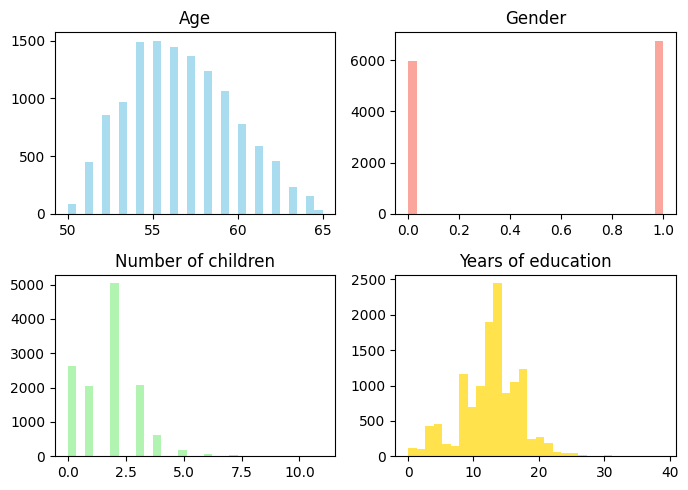

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [11]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.39
Public sector employee     0.23
Employee                   0.20
Self-employed              0.14
Civil servant              0.04
Name: proportion, dtype: float64

In [12]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,12705.00,12705.00,12705.00,12705.00
mean,35.91,63.12,6.69,0.26
std,6.12,2.11,3.40,0.60
min,6.00,57.00,0.08,0.00
25%,33.00,62.00,4.00,0.00
50%,36.00,63.00,7.00,0.00
75%,40.00,65.00,9.00,0.08
max,55.00,68.00,17.00,4.00


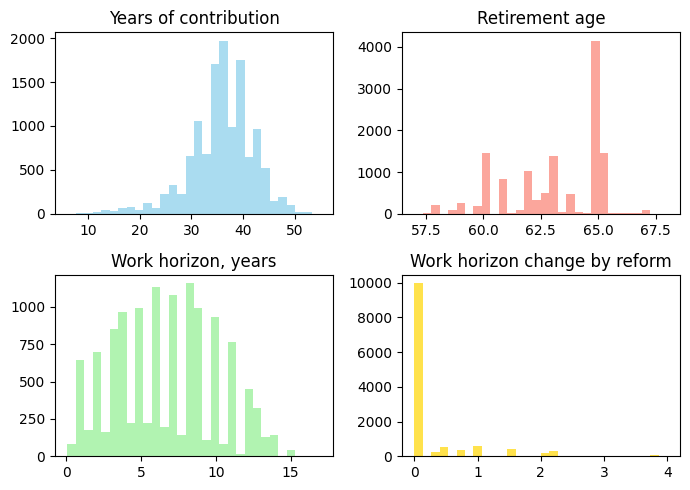

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [14]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64

In [15]:
df["eurod"].value_counts()

eurod
0.0     3365
1.0     3097
2.0     2297
3.0     1579
4.0     1080
5.0      627
6.0      345
7.0      178
8.0       72
9.0       47
10.0      12
11.0       5
12.0       1
Name: count, dtype: int64

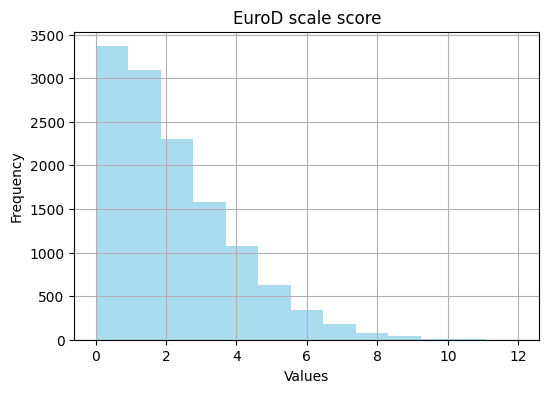

In [16]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [17]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,12705.00,12705.00,12705.00,12705.00,12705.00,12705.00,12705.00
mean,1569.71,58.49,80.56,84.42,49.68,40.26,86.33
std,467.31,13.60,3.87,8.32,5.72,8.58,9.40
min,318.22,5.41,40.91,42.82,18.60,12.50,39.96
25%,1262.36,47.98,78.74,78.08,46.51,34.55,81.51
50%,1495.98,57.75,80.66,87.20,49.48,39.66,88.76
75%,1789.99,70.24,82.63,91.57,52.83,45.93,93.14
max,6766.63,89.61,100.00,99.36,83.72,87.50,100.00


### Waves 4,5,6 common individuals

In [18]:
df.mergeid.nunique()

6694

In [19]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

1709

In [20]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [21]:
w456_common.groupby("country").mergeid.nunique()

country
Austria           129
Belgium           231
Czech Republic    130
Denmark           152
Estonia           280
France            158
Germany            26
Italy             113
Slovenia           79
Spain             109
Switzerland       302
Name: mergeid, dtype: int64

In [22]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [23]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w456_year_common.csv",
    index=False,
)

### Waves 4 and 6

In [24]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [25]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [26]:
w46.mergeid.nunique()

5951

In [27]:
w46.groupby("country").mergeid.nunique()

country
Austria           372
Belgium           737
Czech Republic    462
Denmark           464
Estonia           754
France            428
Germany           657
Italy             548
Slovenia          358
Spain             612
Switzerland       559
Name: mergeid, dtype: int64

In [28]:
w46.groupby("wave").mergeid.nunique()

wave
4    3594
6    4327
Name: mergeid, dtype: int64

In [29]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [30]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

1970

In [31]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [32]:
w46_common.groupby("country").mergeid.nunique()

country
Austria           152
Belgium           273
Czech Republic    158
Denmark           163
Estonia           318
France            180
Germany            29
Italy             140
Slovenia           98
Spain             127
Switzerland       332
Name: mergeid, dtype: int64

In [33]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [34]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year_common.csv",
    index=False,
)